In [90]:
import pandas as pd
import os
import csv
import numpy as np

In [78]:
metadata = pd.read_csv('metadata.csv')

In [79]:
metadata

,Unnamed: 0,county,index,waterbody,station,lease,latitude,longitude,deployment_range,string_configuration,sensor_type,sensor_serial_number,sensor_depth_at_low_tide_m,depth_crosscheck_flag
0,0,Annapolis,0,Annapolis Basin,5006,5006,44.669583,-65.647733,2021-May-14 to 2021-Jun-18,attached to gear,hobo,20330413,1.3,NaN
1,1,Annapolis,360,Annapolis Basin,1042,1042,44.652855,-65.674531,2021-Aug-27 to 2022-May-23,attached to gear,aquameasure,671014,0.5,NaN
2,2,Annapolis,2126,Annapolis Basin,5005,5005,44.634167,-65.711933,2021-May-14 to 2021-Jun-18,attached to gear,aquameasure,680322,1.0,NaN
3,3,Annapolis,16048,Annapolis Basin,Cornwallis,NaN,44.669390,-65.644790,2020-Jun-11 to 2020-Nov-22,sub-surface buoy,aquameasure,670367,1.0,Pass
4,4,Annapolis,39618,Annapolis Basin,Cornwallis,NaN,44.669390,-65.644790,2020-Jun-11 to 2020-Nov-22,sub-surface buoy,vr2ar,547089,2.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,8,Victoria,177281,Aspy Bay,North Harbour,NaN,46.911230,-60.474780,2018-Nov-01 to 2020-Sep-10,unknown,tidbit,20397521,5.0,NaN
1694,9,Victoria,242468,Bras d'Or Lakes,Nyanza Bay E,NaN,46.065243,-60.894831,2016-Sep-14 to 2018-Jul-05,attached to fixed structure,hobo,10034841,8.0,NaN
1695,10,Victoria,258284,Bras d'Or Lakes,Nyanza Bay W,NaN,46.064779,-60.902356,2016-Sep-14 to 2018-Jul-05,attached to fixed structure,hobo,10778920,8.0,NaN
1696,0,Cape_Breton,0,Bras d'Or Lakes,Little Bras d'Or Channel,NaN,46.296261,-60.287689,2016-Sep-13 to 2018-May-30,attached to fixed structure,hobo,10034844,8.0,NaN


In [88]:
segment_id = 132

display(metadata.iloc[segment_id])

# split into different measurement variables
variables = ['dissolved_oxygen_percent_saturation',
             'dissolved_oxygen_uncorrected_mg_per_l',
             'salinity_psu',
             'sensor_depth_measured_m',
             'temperature_degree_c']

variable = 'temperature_degree_c'

Unnamed: 0                                           113
county                                           Halifax
index                                            2793926
waterbody                              St. Margarets Bay
station                                   Shut-In Island
lease                                                NaN
latitude                                       44.557485
longitude                                     -63.954047
deployment_range              2021-Nov-26 to 2022-May-12
string_configuration                    sub-surface buoy
sensor_type                                         hobo
sensor_serial_number                            20834024
sensor_depth_at_low_tide_m                           5.0
depth_crosscheck_flag                               Pass
Name: 132, dtype: object

<Axes: xlabel='timestamp_utc'>

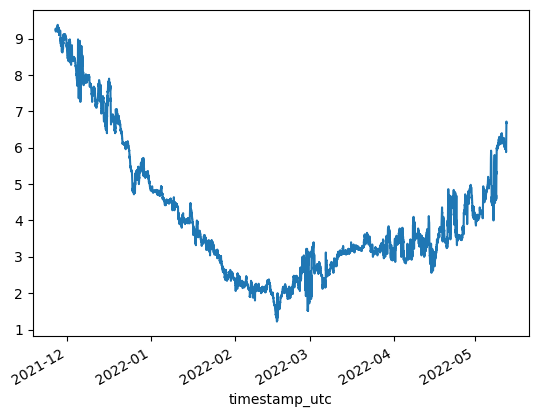

In [108]:
series_filename = os.path.join(variable, f'{segment_id}_{variable}.csv')
series = pd.read_csv(series_filename, index_col='timestamp_utc', parse_dates=True, date_format="%m/%d/%Y %I:%M:%S %p")
data = series[variable]
data.plot()

In [146]:
# Calculate the total number of rows to set as missing
total_missing = int(len(data) * 0.05)

# Ensure at least one row is set as missing
total_missing = max(1, total_missing)

# Randomly determine the number of contiguous blocks
num_blocks = np.random.randint(1, total_missing//50 + 1)

# Calculate the size of each block
block_sizes = np.random.choice(range(1, total_missing + 1), num_blocks, replace=False)
block_sizes = np.sort(block_sizes)[::-1]

# Adjust block sizes to ensure the total number of missing rows is correct
block_sizes[-1] = total_missing - sum(block_sizes[:-1])

In [147]:
total_missing

801

In [148]:
block_sizes

array([  734,   654,   552,   442,   407,   262,   203,   127,    69,
       -2649])

In [149]:
# Randomly select starting indices for each block
start_indices = np.random.choice(range(len(data) - total_missing + 1), num_blocks, replace=False)
start_indices = np.sort(start_indices)

# Set the contiguous blocks of rows as missing (NaN)
for start, size in zip(start_indices, block_sizes):
    data.iloc[start:start + size] = np.nan

/tmp/ipykernel_2677/3498889999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[start:start + size] = np.nan
/tmp/ipykernel_2677/3498889999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[start:start + size] = np.nan
/tmp/ipykernel_2677/3498889999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[start:start + size] = np.nan
/tmp/ipykernel_2677/3498889999.py:7: SettingWithCopyWarning: 
A value is 

<Axes: xlabel='timestamp_utc'>

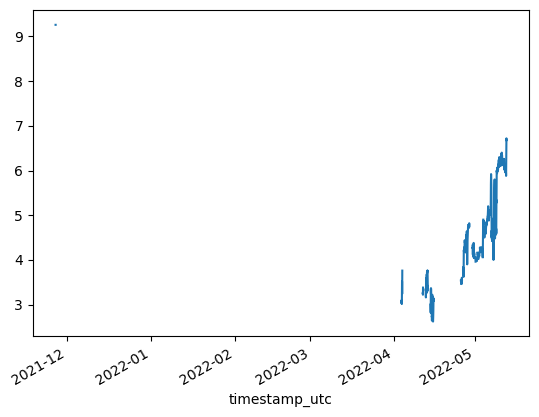

In [104]:
data.plot()